<a href="https://colab.research.google.com/github/ticapix/gaia-x-notebooks/blob/main/Gaia-X%20Compliance%2024.04%20-%20Extract%20Criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract criteria from Gaia-X Compliance 24.04-prerelease

In [6]:
from bs4 import BeautifulSoup
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Extract and load all criteria

In [7]:
 # compliance document url
compliance_criteria_url = "https://docs.gaia-x.eu/policy-rules-committee/compliance-document/24.04-prerelease/criterions/"

# fetch the page
compliance_criteria_html = requests.get(compliance_criteria_url)

# parse the page
compliance_criteria = BeautifulSoup(compliance_criteria_html.text)

# extract criteria
criteria = []
for criterion in compliance_criteria.find_all('span', {"class":"criteria-data"}):
    criteria.append(json.loads(criterion.text))

print(f"found {len(criteria)} criteria")

found 63 criteria


## Criteria distribution

In [8]:
scheme = ['Conformity', 'Label L1', 'Label L2', 'Label L3']
types = ["declaration", "certification", "N/A"]
df = pd.DataFrame([[0] * 3] * 4, scheme, types)

for criterion in criteria:
    df.loc["Conformity", criterion["conformity"]] += 1
    df.loc["Label L1", criterion["labelL1"]] += 1
    df.loc["Label L2", criterion["labelL2"]] += 1
    df.loc["Label L3", criterion["labelL3"]] += 1

print(df.head())

            declaration  certification  N/A
Conformity           47              0   16
Label L1             53              0   10
Label L2             19             35    9
Label L3             17             40    6


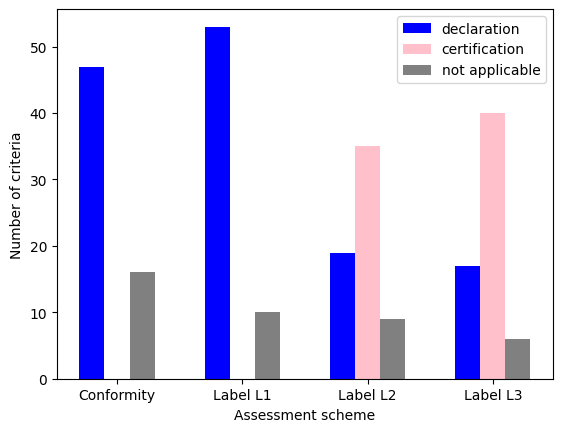

In [9]:
plt.cla()
plt.clf()
# from https://datagy.io/matplotlib-bar-charts/
xlabels = list(df.index)
# create data
x = np.arange(len(xlabels))
declarations = list(df["declaration"])
certifications = list(df["certification"])
na = list(df["N/A"])
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-width, declarations, width, color='blue')
plt.bar(x, certifications, width, color='pink')
plt.bar(x+width, na, width, color='grey')
plt.xticks(x, xlabels)
plt.xlabel("Assessment scheme")
plt.ylabel("Number of criteria")
plt.legend(["declaration", "certification", "not applicable"])
plt.show()